In [6]:
import numpy as np
import argparse
import tensorflow as tf
from process.preprocess import Preproccessor
from model.cnn_lstm_generator import CNNLSTMGenerator
import cv2
import pickle
import os
from PIL import Image

In [11]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"
word2id_path = './outputs/word2id.pkl'
gpu_config = '/gpu:1'
model_path = './outputs/models/model1'
with open(word2id_path, 'rb') as word2id_in:
    word2id = pickle.load(word2id_in)
height = 32
width = 128

In [3]:
def preprocess(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, 6)

    # 二值化
    img = cv2.adaptiveThreshold(img, 255,
                                   adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                                   thresholdType=cv2.THRESH_BINARY,
                                   blockSize=21,
                                   C=20)
    
    width = 128
    height = 32
    img = cv2.resize(img, (width, height))
    img = np.reshape(img, (height, width, 1))
    return img

In [22]:
# load data and preprocess
test_path = './data/test_data/1'
test_files = os.listdir(test_path)
imgs = []
for test_file in test_files:
    file_path = os.path.join(test_path, test_file)
    img = cv2.imread(file_path, 0)
    img = preprocess(img)
    imgs.append(img)

In [23]:
config = tf.ConfigProto(allow_soft_placement=True)
words_list = []
graph = tf.Graph()
with graph.as_default():
    with tf.Session(config=config) as sess:
        with tf.device(gpu_config):
            # 指定网络参数初始化方式
            initializer = tf.random_uniform_initializer(-0.1, 0.1)
            with tf.variable_scope('model', initializer=initializer, reuse=False):
                
                model = CNNLSTMGenerator(32, 128, 20, len(word2id), word2id, batch_size=1)
                saver = tf.train.Saver()
                saver.restore(sess, model_path)
                for img in imgs:
                    words_list.append(model.predict(sess, img))

32
[272, 300]
[None, 32, 8, 64]
[None, 32, 600]
INFO:tensorflow:Restoring parameters from ./outputs/models/model1


In [15]:
for img, text in zip(imgs, words_list):
    img = np.reshape(img, (height, width))
    img = Image.fromarray(img)
    img

['干', '导', '学', '明', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>']


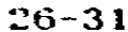

In [33]:
num = 8
img = np.reshape(imgs[num], (height, width))
img = Image.fromarray(img)
print(words_list[num])
img

In [25]:
print(words_list)

[['嗜', '酸', '胞', '(', '胞', '计', '视', ')', ')', '差', ')', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>'], ['↑', '<EOS>', '0', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>'], ['嗜', '酸', '性', '细', '胞', '百', '分', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>'], ['↑', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>'], ['嗜', '酸', '性', '细', '胞', '绝', '对', '对', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>'], ['2', '0', '0', '.', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>', '<EOS>'], ['%', '<EOS>', '<EOS>', '<EOS>', '<EOS>